In [1]:
import config
import pandas as pd
import time
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
from kneed import KneeLocator
from IPython.display import IFrame
from helpers import play_song
from helpers import get_playlist_tracks
from helpers import load

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

## Loading songs from csv file

In [2]:
df_tracks = pd.read_csv('songs.csv')

In [3]:
df_tracks.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
df_tracks_num = df_tracks.select_dtypes(include=np.number)

In [5]:
scaler = StandardScaler()
scaler.fit(df_tracks_num)

tracks_scaled = scaler.transform(df_tracks_num)
df_tracks_num_scaled = pd.DataFrame(tracks_scaled, columns = df_tracks_num.columns)

In [6]:
with open("Model/scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

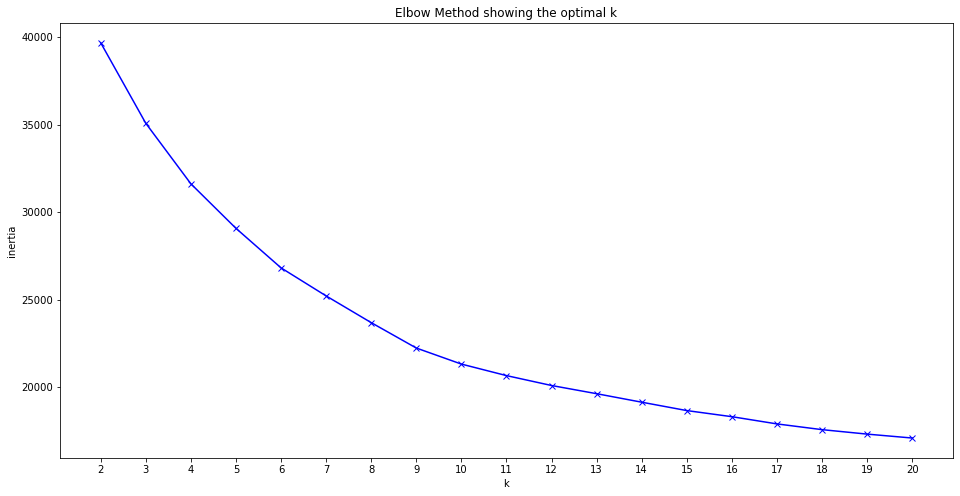

In [7]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(df_tracks_num_scaled)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [8]:
kneedle = KneeLocator(K, inertia, S=1.0, curve="convex", direction="decreasing")

In [9]:
kneedle.elbow

9

In [10]:
kmeans = KMeans(n_clusters=9, random_state=1234)
kmeans.fit(df_tracks_num_scaled)

KMeans(n_clusters=9, random_state=1234)

In [11]:
labels = kmeans.labels_

## Adding cluster labels to the main dataframe

In [12]:
df_tracks['cluster'] = labels.tolist()

In [13]:
with open("Model/kmeans.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [14]:
def song_recommender():
    
    print(""" This Program recommends a song based on user's taste """)
    
    time.sleep(3)



    usersong = input('####### TYPE A SONG YOU LIKE #######\n\n')
    song = []
    artist = []
    ids = []
    results = sp.search(q=usersong,limit=5,market="GB")
    for item in results['tracks']['items']:
        song.append(item['name'])
        artist.append(item['artists'][0]['name'])
        ids.append(item['id'])
        d=list(zip(song,artist,ids))
        info = pd.DataFrame(d,columns=['SONG', 'ARTIST','id'])
        info.index += 1
        info_show = info[['SONG','ARTIST']]

    print(info_show)

    q = int(input('#######  WHICH SONG DID YOU MEAN? PRESS A NUMBER ########'))


    track_id = info.loc[q]['id']



    audio_features = sp.audio_features(track_id)[0]

    list_of_features = []

    for i in audio_features:
        list_of_features.append(audio_features[i])
    df_user = pd.DataFrame(columns=['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                                    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 
                                    'type', 'id', 'uri', 
                                    'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

    df_user.loc[0] = list_of_features

    df_user = df_user[["danceability","energy","loudness","speechiness","acousticness",
        "instrumentalness","liveness","valence","tempo","duration_ms"]]

    df_user = df_user.sort_index(axis=1)

    scaler2 = load("Model/scaler.pickle")

    user_scaled  = scaler2.transform(df_user)

    df_user_scaled = pd.DataFrame(user_scaled, columns = df_user.columns)

    model = load("Model/kmeans.pickle")

    cluster_of_user = model.predict(df_user_scaled)[0]

    track_id = df_tracks[df_tracks['cluster'] == cluster_of_user].sample()['id']

    track_id = list(track_id)[0]

    print('########## RECOMMENDATION ###############################\n')

    return play_song(track_id)

In [15]:
song_recommender()

 This Program recommends a song based on user's taste 
####### TYPE A SONG YOU LIKE #######

we
                        SONG                      ARTIST
1                 Wet Dreamz                     J. Cole
2            Sweater Weather           The Neighbourhood
3                 West Coast                Lana Del Rey
4  We Don't Talk About Bruno  Carolina Gaitán - La Gaita
5              We Found Love                     Rihanna
#######  WHICH SONG DID YOU MEAN? PRESS A NUMBER ########1
########## RECOMMENDATION ###############################

